In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
sales = pd.read_csv('Diwali Sales Data.csv', encoding = 'unicode_escape')

In [17]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [18]:
sales.shape

(11251, 15)

In [19]:
sales.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [20]:
sales.tail()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN
11250,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188.0,NaN,NaN


In [21]:
sales.drop(['Status','unnamed1'], axis=1, inplace = True)

In [24]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [27]:
pd.isnull(sales).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [34]:
sales.dropna(inplace = True)

In [35]:
sales.shape

(11239, 13)

In [42]:
sales.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [40]:
sales['Amount'] = sales['Amount'].astype('int')

In [41]:
sales['Amount'].dtypes

dtype('int32')

In [46]:
sales[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

On the basis of Gender

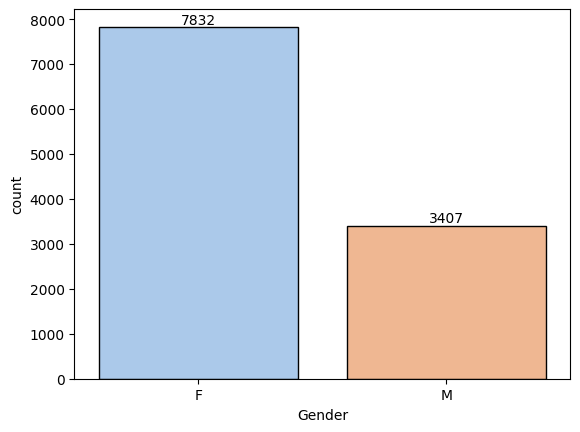

In [54]:
count = sns.countplot(x = 'Gender',hue='Gender',legend=False, data = sales, palette='pastel',edgecolor='black')

for bars in count.containers:
    count.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

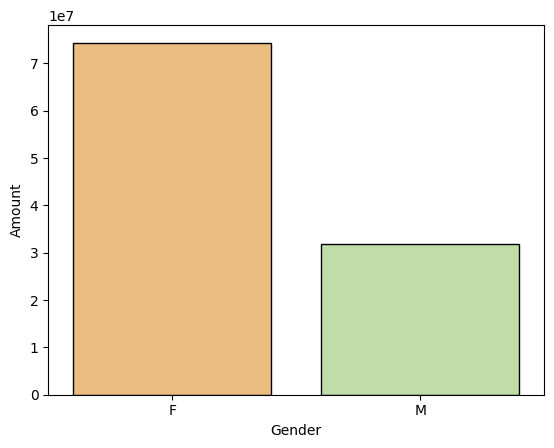

In [69]:
sales_gen = sales.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Gender',y='Amount',data = sales_gen, hue ='Gender',legend=False,palette="Spectral", edgecolor ="black")


From the above graphs it can be concluded that most of the buyers are females and the amount spend by females is greater than mens  

On the basis of Age group

In [70]:
sales.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

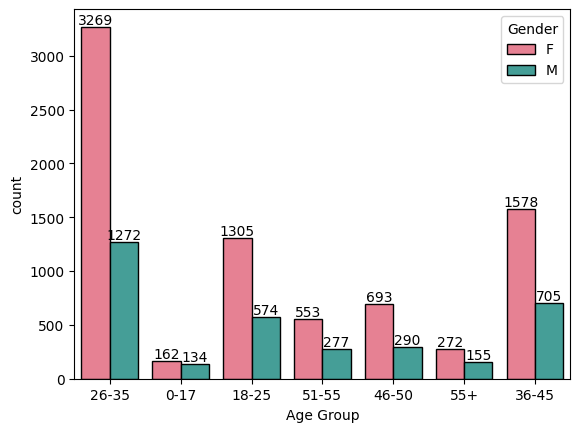

In [77]:
ax=sns.countplot(x = 'Age Group',hue = 'Gender',data=sales,palette='husl',edgecolor='black')

for bars in ax.containers:
    ax.bar_label(bars)

In [78]:
sales_age=sales.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

In [79]:
sales_age

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


<Axes: xlabel='Age Group', ylabel='Amount'>

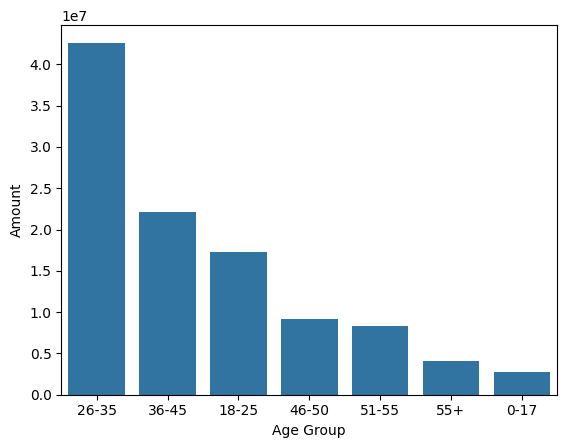

In [84]:
sns.barplot(x='Age Group',y='Amount',data=sales_age)


From the above the graphs we can conclude that most of the buyers are females and between age group of 26-35 

On the basis of State

In [85]:
sales.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [98]:
sales_state=sales.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

In [99]:
sales_state

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


<Axes: xlabel='State', ylabel='Orders'>

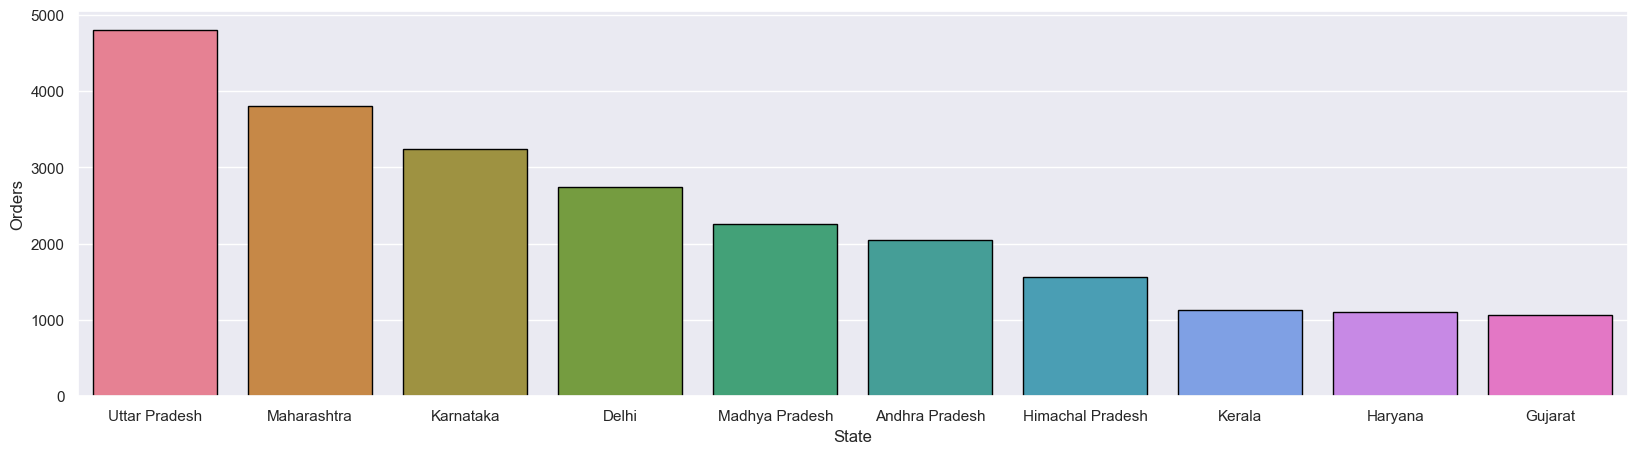

In [100]:
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='State',y='Orders',hue='State', data=sales_state,palette="husl",edgecolor='black')

In [102]:
sales_SA=sales.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

In [103]:
sales_SA

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


<Axes: xlabel='State', ylabel='Amount'>

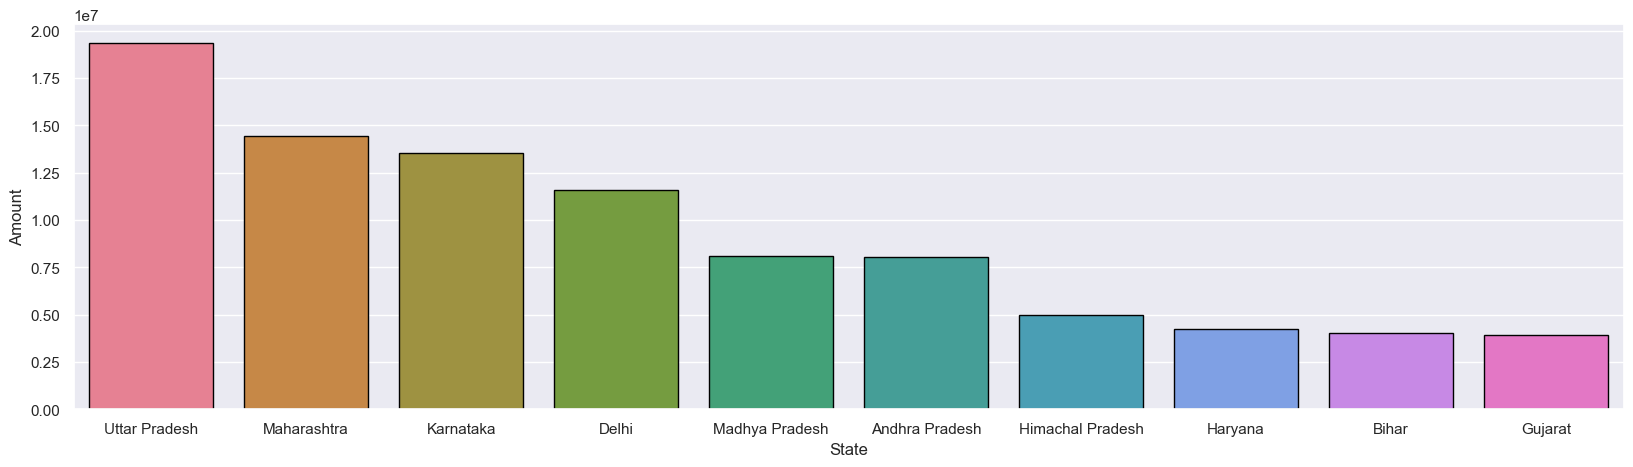

In [106]:
sns.barplot(x='State',y='Amount',data=sales_SA,hue='State',palette='husl',edgecolor='black')

From the above graphs it can be concluded that most of the orders and total sales are from Uttar Pradesh,Maharashtra and Karnataka 

On the basis of Marital Status

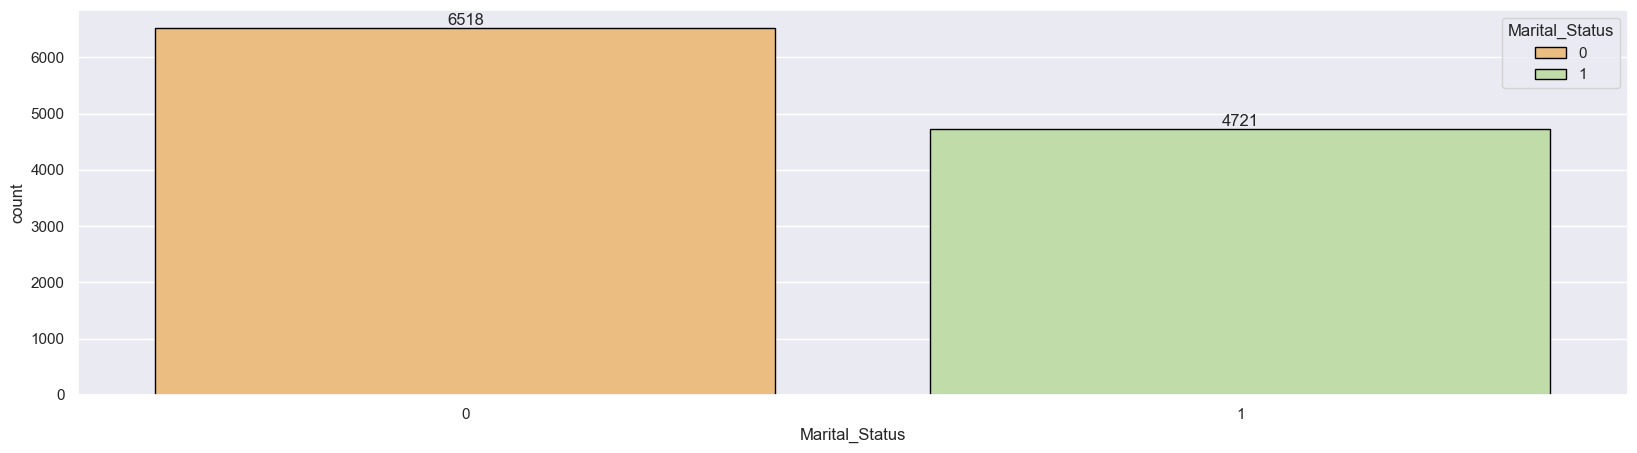

In [113]:
ms = sns.countplot(x='Marital_Status',hue='Marital_Status', data=sales,palette="Spectral", edgecolor='black')

for bars in ms.containers:
    ms.bar_label(bars)

In [115]:
sales_ms=sales.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

In [116]:
sales_ms

,Marital_Status,Gender,Amount
0,0,F,43786646
2,1,F,30549207
1,0,M,18338738
3,1,M,13574538


<Axes: xlabel='Marital_Status', ylabel='Amount'>

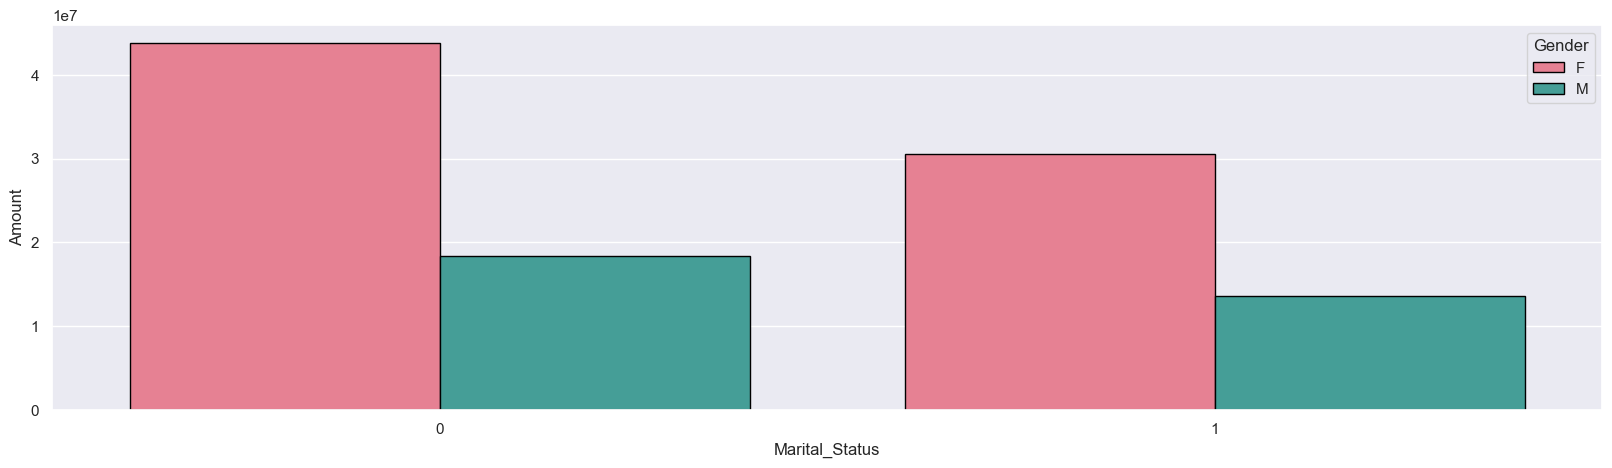

In [117]:
sns.barplot(data=sales_ms,x='Marital_Status',y='Amount',hue="Gender",palette='husl',edgecolor='black')

From the above graphs we can conclude that most of the buyers are married and are females and they also have higher purchasing power

On the basis of Occupation

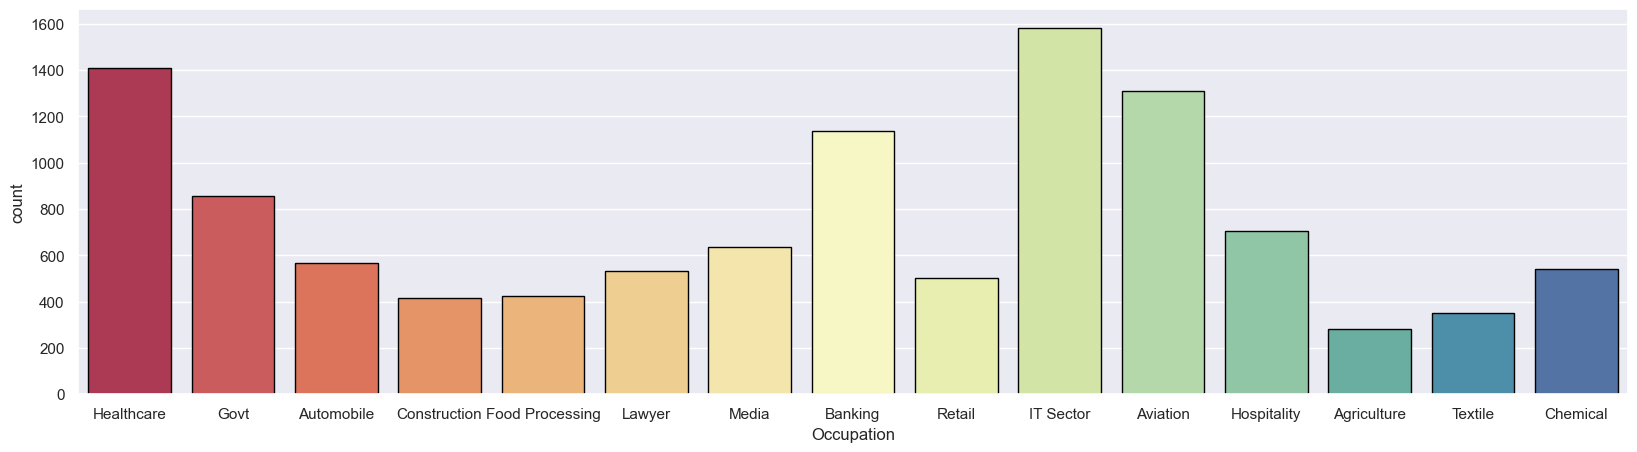

In [120]:
oc = sns.countplot(data=sales,x='Occupation',hue='Occupation',palette="Spectral",edgecolor='black')

In [121]:
sales_oc=sales.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

In [122]:
sales_oc

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


<Axes: xlabel='Occupation', ylabel='Amount'>

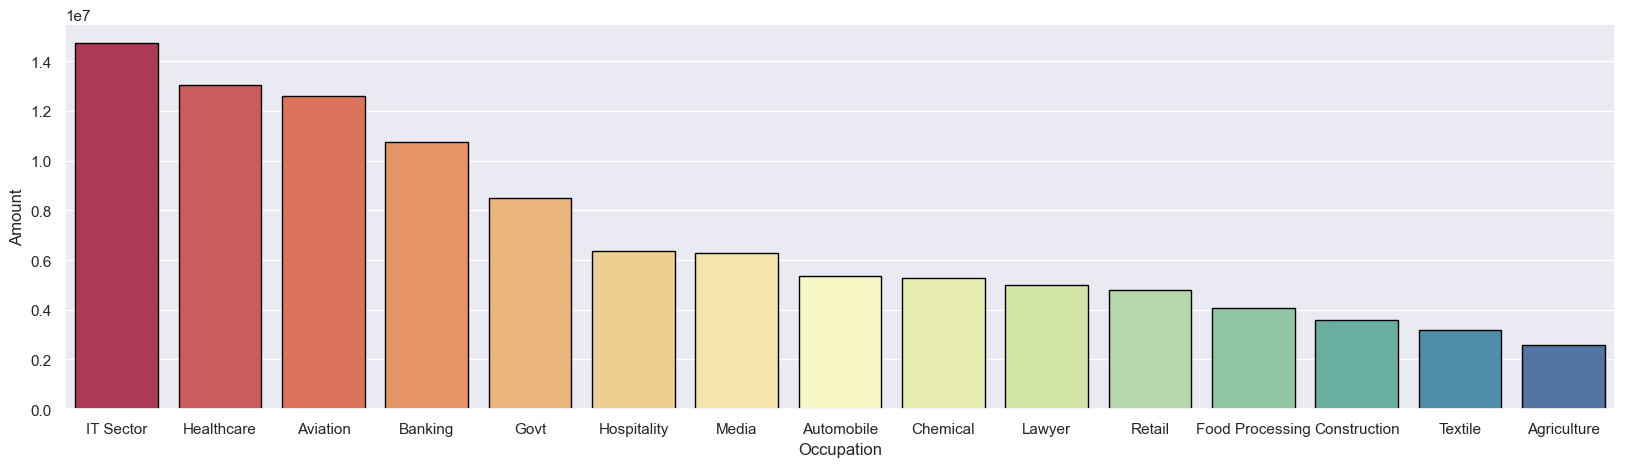

In [123]:
sns.barplot(x='Occupation',y='Amount',data=sales_oc,hue='Occupation',palette="Spectral",edgecolor='black')

The conclusion from above graphs states that most of the buyers are from IT Sector,Healthcare and aviations

On the basis of Product Category

<Axes: xlabel='Product_Category', ylabel='count'>

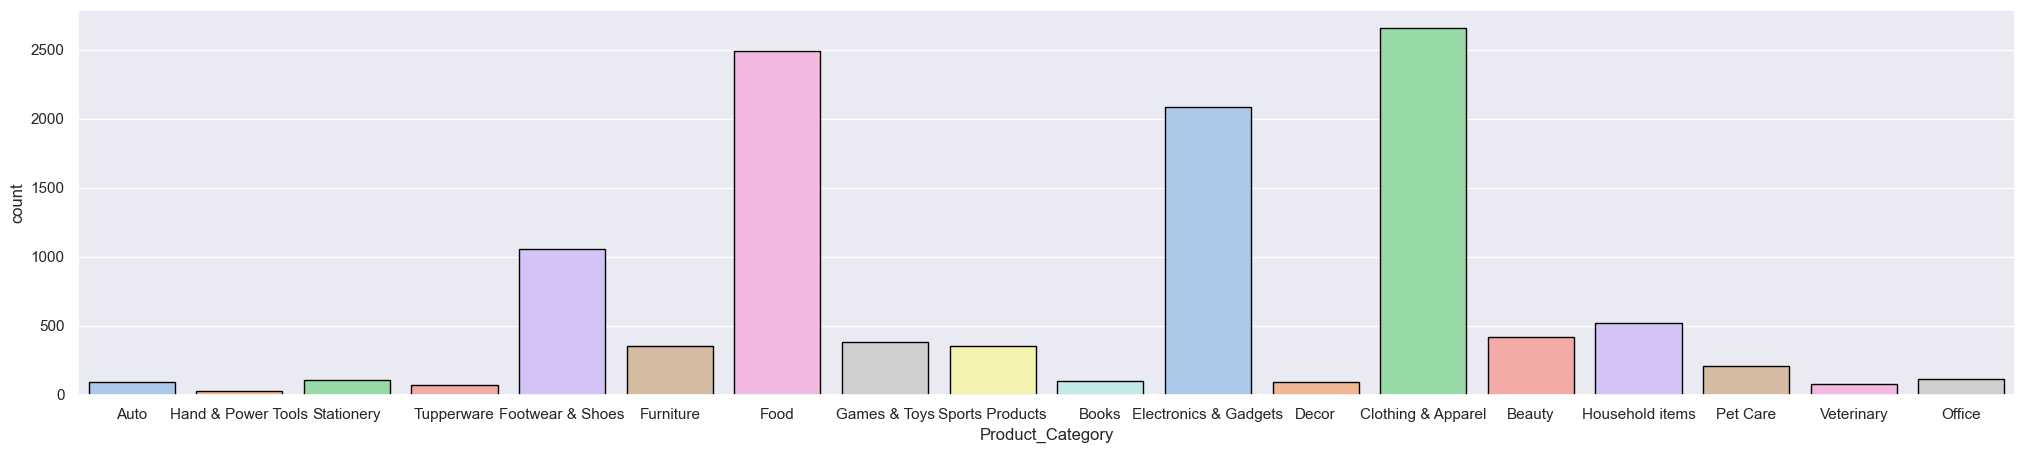

In [126]:
sns.set(rc={'figure.figsize':(25,5)})
sns.countplot(x='Product_Category',data=sales,hue='Product_Category',palette="pastel",edgecolor='black')

In [132]:
sales_pd = sales.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

In [133]:
sales_pd

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1958609
15,Stationery,1676051


<Axes: xlabel='Product_Category', ylabel='Amount'>

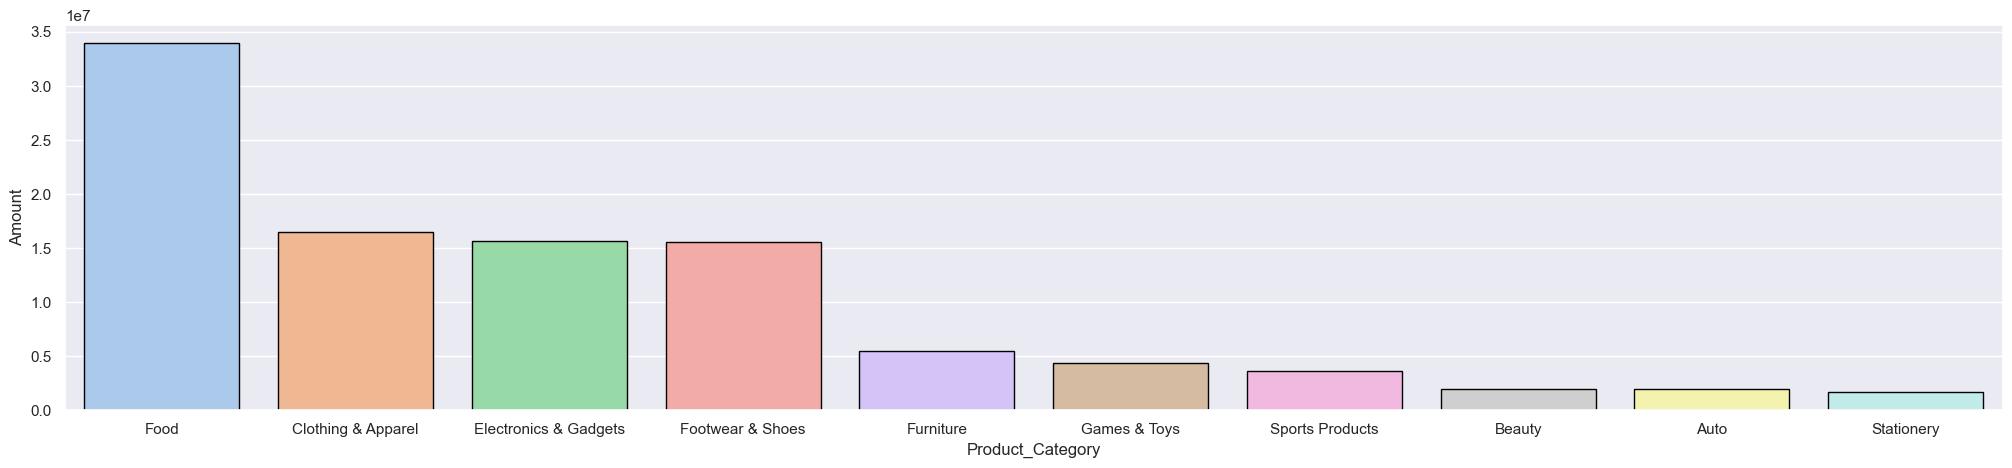

In [134]:
sns.barplot(data=sales_pd,x='Product_Category',y='Amount',hue='Product_Category',palette="pastel",edgecolor='black')

The most sold products are from food, footware and Electronics category

# Conclusion

Married women from UP,Maharashtra and Karnataka of age group between 26-35 yrs working in IT sector, Healthcare and Aviation have higher chances of buying products like food, clothing and electronics 